In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Layer, Input

1 Physical GPUs, 1 Logical GPUs


In [2]:
model_name = 'resnet'

cifar100_model_feat = np.load(f'./data/CIFAR100_{model_name}_train_feat.npy')
print(cifar100_model_feat.shape)

cifar100_vanilla = np.load(f'./data/CIFAR100_vae_vanilla_{model_name}_encoding_train.npy')
print(cifar100_vanilla.shape)

cifar100_injected = np.load(f'./data/CIFAR100_vae_injected_{model_name}_encoding_train.npy')
print(cifar100_injected.shape)

cifar100_adapted = np.load(f'./data/CIFAR100_vae_adapted_{model_name}_encoding_train.npy')
print(cifar100_adapted.shape)

(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

(50000, 2048)
(50000, 2048)
(50000, 2048)
(50000, 2048)


In [3]:
input_shape = (cifar100_model_feat.shape[1],)
batch_size = 128
epochs = 100

In [4]:
model = Sequential( [
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
], name=model_name)

model.compile(optimizer=Adam(lr=1e-4),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

model.fit(x=cifar100_model_feat, y=train_labels, batch_size=batch_size, epochs=epochs)

Model: "resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
Total params: 1,226,212
Trainable params: 1,226,212
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 4s 9ms/step - loss: 4.3401 - accuracy: 0.0930
Epoch 2/100
391/391 [==============================] - 3s 9ms/step - loss: 2.7584 - accuracy: 0.3346
Epoch 3/100
391/391 [=========================

391/391 [==============================] - 4s 9ms/step - loss: 0.0058 - accuracy: 0.9992
Epoch 72/100
391/391 [==============================] - 4s 10ms/step - loss: 0.0040 - accuracy: 0.9996
Epoch 73/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0031 - accuracy: 0.9997
Epoch 74/100
391/391 [==============================] - 3s 9ms/step - loss: 0.0033 - accuracy: 0.9997
Epoch 75/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0034 - accuracy: 0.9997
Epoch 76/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0026 - accuracy: 0.9998
Epoch 77/100
391/391 [==============================] - 3s 9ms/step - loss: 0.0167 - accuracy: 0.9959
Epoch 78/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0727 - accuracy: 0.9786
Epoch 79/100
391/391 [==============================] - 3s 9ms/step - loss: 0.0081 - accuracy: 0.9990
Epoch 80/100
391/391 [==============================] - 4s 9ms/step - loss: 0.0033 - accuracy:

In [5]:
vanilla_model = Sequential([
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
], name='vanilla')

vanilla_model.compile(
    optimizer=Adam(lr=1e-4),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

vanilla_model.summary()

vanilla_model.fit(
    x=cifar100_vanilla, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs
)

Model: "vanilla"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               12900     
Total params: 1,226,212
Trainable params: 1,226,212
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 4s 11ms/step - loss: 4.7043 - accuracy: 0.0105
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 4.5170 - accuracy: 0.0291
Epoch 3/100
391/391 [======================

391/391 [==============================] - 4s 11ms/step - loss: 1.0374e-06 - accuracy: 1.0000
Epoch 71/100
391/391 [==============================] - 4s 11ms/step - loss: 8.5500e-07 - accuracy: 1.0000
Epoch 72/100
391/391 [==============================] - 4s 11ms/step - loss: 7.1297e-07 - accuracy: 1.0000
Epoch 73/100
391/391 [==============================] - 4s 11ms/step - loss: 5.9703e-07 - accuracy: 1.0000
Epoch 74/100
391/391 [==============================] - 4s 11ms/step - loss: 4.9930e-07 - accuracy: 1.0000
Epoch 75/100
391/391 [==============================] - 4s 11ms/step - loss: 4.1979e-07 - accuracy: 1.0000
Epoch 76/100
391/391 [==============================] - 4s 11ms/step - loss: 3.5479e-07 - accuracy: 1.0000
Epoch 77/100
391/391 [==============================] - 4s 11ms/step - loss: 3.0110e-07 - accuracy: 1.0000
Epoch 78/100
391/391 [==============================] - 4s 11ms/step - loss: 2.5705e-07 - accuracy: 1.0000
Epoch 79/100
391/391 [============================

In [6]:
injected_model = tf.keras.Sequential([
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
], name='injected')

injected_model.compile(
    optimizer=Adam(lr=1e-4),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

injected_model.summary()

injected_model.fit(
    x=cifar100_injected, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs
)

Model: "injected"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               12900     
Total params: 1,226,212
Trainable params: 1,226,212
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 5s 12ms/step - loss: nan - accuracy: 0.0102
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.0103
Epoch 3/100
391/391 [===========================

391/391 [==============================] - 5s 12ms/step - loss: nan - accuracy: 0.0095
Epoch 74/100
391/391 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.0099
Epoch 75/100
391/391 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.0100
Epoch 76/100
391/391 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.0099
Epoch 77/100
391/391 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.0101
Epoch 78/100
391/391 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.0095
Epoch 79/100
391/391 [==============================] - 5s 12ms/step - loss: nan - accuracy: 0.0099
Epoch 80/100
391/391 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.0097
Epoch 81/100
391/391 [==============================] - 5s 12ms/step - loss: nan - accuracy: 0.0111
Epoch 82/100
391/391 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.0103
Epoch 83/100


In [7]:
adapted_model = Sequential([
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
],name='adapted' )

adapted_model.compile(
    optimizer=Adam(lr=1e-4),             
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

adapted_model.summary()

adapted_model.fit(
    x=cifar100_adapted, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs
)

Model: "adapted"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               12900     
Total params: 1,226,212
Trainable params: 1,226,212
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 5s 11ms/step - loss: 174.2003 - accuracy: 0.0145
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 111.6112 - accuracy: 0.0386
Epoch 3/100
391/391 [==================

391/391 [==============================] - 4s 11ms/step - loss: 0.1274 - accuracy: 0.9734
Epoch 72/100
391/391 [==============================] - 4s 11ms/step - loss: 0.1099 - accuracy: 0.9763
Epoch 73/100
391/391 [==============================] - 4s 11ms/step - loss: 0.1340 - accuracy: 0.9742
Epoch 74/100
391/391 [==============================] - 4s 11ms/step - loss: 0.1192 - accuracy: 0.9752
Epoch 75/100
391/391 [==============================] - 4s 11ms/step - loss: 0.1059 - accuracy: 0.9766
Epoch 76/100
391/391 [==============================] - 4s 11ms/step - loss: 0.1036 - accuracy: 0.9777
Epoch 77/100
391/391 [==============================] - 4s 11ms/step - loss: 0.1208 - accuracy: 0.9762
Epoch 78/100
391/391 [==============================] - 3s 9ms/step - loss: 0.1582 - accuracy: 0.9699
Epoch 79/100
391/391 [==============================] - 3s 9ms/step - loss: 0.2515 - accuracy: 0.9716
Epoch 80/100
391/391 [==============================] - 3s 9ms/step - loss: 0.2896 - acc

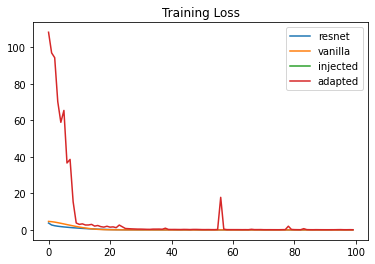

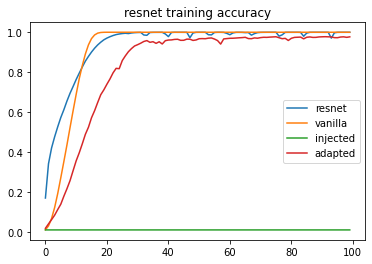

In [8]:
def plot(models, metric):
    for model in models:
        plt.plot(model.history.history['loss'], label=f'{model.name}')
        #plt.plot(model.history.history['val_loss'], label='val_loss', color='red')
    plt.legend()
    plt.title('Training Loss')
    plt.savefig(f'./plots/{model_name}/loss.png')
    plt.show()
   

    for model in models:
        plt.plot(model.history.history[f'{metric}'], label=f'{model.name}')
       # plt.plot(model.history.history[f'val_{metric}'], label=f'val_{metric}', color='red')
    plt.legend()
    plt.title(f'{model_name} training accuracy')
    plt.savefig(f'./plots/{model_name}/accuracy.png')
    plt.show()

        
models = [model, vanilla_model, injected_model, adapted_model]
plot(models, 'accuracy')